# Coffee Sales Analysis

![coffee_image](../assets/coffee-image.jpeg "alt-coffee_image")

## About Author

Author: Joshua Farara

Project: title

### Contact Info
Click on link below to contact/follow/correct me:

Email: joshua.farara@gmail.com

[LinkedIn](https://www.linkedin.com/in/joshuafarara/)

[Facebook](https://www.facebook.com/josh.farara/)

[Twitter](https://x.com/FararaTheArtist)

[Github](https://github.com/JoshuaFarara)


## About Data

Title: Dataset Title

Dataset: [Link](https://www.kaggle.com/datasets/ihelon/coffee-sales/data)

Description of data:

This dataset contains detailed records of coffee sales from a vending machine. It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products. The dataset spans from March 2024 to June 2024, capturing daily transaction data. And it's continue added new information.

### Dataset Columns Names

Features:


### Metadata

Source:

Collection Methodology:

License:



### Task

Describe task at hand for this dataset.

### Objectives

Describe objective at had for this dataset.

### Kernel Version Used

Python==3.11.7

## Import Libraries

We will use the following libraries¶
1. Pandas: Data manipulation and analysis
2. Numpy: Numerical operations and calculations
3. Matplotlib: Data visualization and plotting
4. Seaborn: Enhanced data visualization and statistical graphics
5. Scipy: Scientific computing and advanced mathematical operations

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import sys

# # Get the directory of the current script
# script_dir = os.path.dirname(os.path.abspath(__file__))

# # Change the working directory to the script's directory
# os.chdir(script_dir)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Loading and Exploration | Cleaning

### Load a CSV file then creating a dataframe

In [2]:
# Kaggle Notebook
# df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')


#Local Machine Notebook
df = pd.read_csv('../../data/coffee_sales_data.csv')


### Set the option to show maximum columns

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

### Get a sneak peek of data
The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest

In [4]:
df.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


### Let's see the column names

In [5]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

### Let's have a look on the shape of the dataset

In [6]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 896, and columns are 6.


### Let's have a look on the columns and their data types using detailed info function

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


### Count the missing values

In [8]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

## Cleaning Set 1

* There are 896 rows, and 6 columns in the dataset.

* The data type of all columns are objects except for df['money'] which is float.

* The columns in the datasets are:
    * 'date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'
    
* There are a few missing values in the dataset, which we will read in detail and deal with later on in the notebook.

* rename columns 'cash_type':'payment_type','card':'card_number', 'money':'amount_paid_uah'

* datetime converrted to a datetime dtype.

* money column after renaming 'amount_paid_uah' can derive an exchanged USD column for later comparison and analysis




### Task:

Clean the data by changing column names 


1. Change column names to appropriate names matching the data.
2. 

## Changing column names 

Changed: cash_type to payment_type since cash and card payments are accepted

In [9]:
df.rename(columns={'cash_type':'payment_type', 'card':'card_number', 'money':'amount_paid_uah'}, inplace=True)

In [10]:
df.columns

Index(['date', 'datetime', 'payment_type', 'card_number', 'amount_paid_uah',
       'coffee_name'],
      dtype='object')

## Coverting datetime Column from object to datetime64 dtype

In [41]:
df['datetime']= pd.to_datetime(df['datetime'])
# Check type for the time column
# df['datetime'].info
df.head(10)

<bound method Series.info of 0     2024-03-01 10:15:50.520
1     2024-03-01 12:19:22.539
2     2024-03-01 12:20:18.089
3     2024-03-01 13:46:33.006
4     2024-03-01 13:48:14.626
5     2024-03-01 15:39:47.726
6     2024-03-01 16:19:02.756
7     2024-03-01 18:39:03.580
8     2024-03-01 19:22:01.762
9     2024-03-01 19:23:15.887
10    2024-03-01 19:29:17.391
11    2024-03-02 10:22:06.957
12    2024-03-02 10:30:35.668
13    2024-03-02 10:41:41.249
14    2024-03-02 11:59:45.484
15    2024-03-02 14:38:35.535
16    2024-03-02 16:37:24.475
17    2024-03-02 17:34:54.969
18    2024-03-03 10:10:43.981
19    2024-03-03 10:27:18.561
20    2024-03-03 11:33:56.118
21    2024-03-03 12:26:56.098
22    2024-03-03 13:09:36.321
23    2024-03-03 17:06:40.271
24    2024-03-03 17:08:45.895
25    2024-03-03 18:03:23.369
26    2024-03-03 18:04:27.946
27    2024-03-03 18:08:04.959
28    2024-03-04 10:03:51.994
29    2024-03-04 10:54:50.958
30    2024-03-04 11:05:16.184
31    2024-03-04 14:04:37.734
32    2024-

## Creating Time Column

In [13]:
df[['new_date', 'time']] =df['datetime'].str.split(' ', n=1, expand=True)
df = df.drop(['new_date'], axis=1)
# df = df.drop(['new_date', 'datetime'], axis=1)
# df = ['date', 'time', 'payment_type', 'card_number', 'amount_paid_usd', 'coffee_name']

In [42]:
# check the data
df.head()


,date,datetime,payment_type,card_number,amount_paid_uah,coffee_name,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626


In [ ]:
# df['time']

## Convert amount_paid_uah(formerly df['money']) to USD.

.024 USD  = 1 Ukrainian hryvnia

1 USD = 40.3317	Ukrainian hryvnia

In [ ]:
UAH_to_USD = .024
df['amount_paid_usd'] = df['amount_paid_uah'] * UAH_to_USD

In [ ]:
df.head(5)

## Analytical Questions

Product analysis:
1. Total Revenue

2. Total Sales per Coffee 

3. Average amount paid per cup 
 
4. Average amount paid per cup for each coffee type in UAH

5. Which coffee had the highest/lowest sales?


Dates and Time analysis:
3. Which coffee is sold in the morning, afternoon, evening?

4. Which coffee is sold most/least during the week/weekend?

5. Which dates have the highest sales?

6. What day's of the week do coffee sales occur the most?

7. What is the most frequent time of sales at this vending machine?

8. What are the sale amounts for the card numbers, frequency, total amount paid, coffee types?

9. Are there any holidays that cause a spike or decline in sales?

10. 

Consumer analysis:

11. What are the sale amounts for the card numbers, frequency, total amount paid, coffee types?

12. What is the ratio amongst card consumers and cash consumers?

13. Do cash consumers spend more then card counterparts?

Currency analysis:
14. What is the exchange rate between UAH and USD at the time of this data? Compared to the average?

15. 

### Coffee Sales Report

#### Product Analysis:

In [ ]:
df['coffee_name'] = df['coffee_name'].astype('str') 

In [ ]:
df[['coffee_name', 'amount_paid_uah']]

##### Plot total revenue

In [ ]:
# 1. Total Revenue
total_revenue_uah = df['amount_paid_uah'].sum()
total_revenue_usd = df['amount_paid_usd'].sum()
print(f"Total Revenue (UAH): {total_revenue_uah}, Total Revenue (USD): {total_revenue_usd}")

In [ ]:
# Plot total revenue
plt.figure(figsize=(5, 5))
plt.bar(['Total Revenue (UAH)', 'Total Revenue (USD)'], [total_revenue_uah, total_revenue_usd], color=['blue', 'green'])
plt.xlabel('Currency')
plt.ylabel('Total Revenue')
plt.title('Total Revenue in UAH and USD')
plt.savefig('./visualizations/Total Revenue in UAH and USD.jpg')
plt.close()

In [ ]:
# Group data by coffee_name
grouped_coffee = df.groupby('coffee_name')

In [ ]:
# 3. Total Sales per Coffee Type in UAH
total_amount_paid_uah = grouped_coffee['amount_paid_uah'].sum()
print(total_amount_paid_uah)

In [ ]:
# Plot total sales per coffee type in UAH
plt.figure(figsize=(5, 5))
plt.bar(total_amount_paid_uah.index, total_amount_paid_uah, alpha=0.7, color='skyblue')
plt.xlabel('Coffee Name')
plt.ylabel('Total Amount Paid (UAH)')
plt.title('Total Sales per Coffee Type in UAH')
plt.xticks(rotation=45)
plt.savefig('./visualizations/Total Sales per Coffee Type in UAH.jpg')
plt.close()

##### Total Revenue by Coffee Name Avanced Plotting of 

In [ ]:
# Group by coffee_name and calculate total revenue
total_revenue_uah_coffee = df.groupby('coffee_name')['amount_paid_uah'].sum()
total_revenue_usd_coffee = df.groupby('coffee_name')['amount_paid_usd'].sum()

In [ ]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot UAH data
color = 'tab:blue'
ax1.set_xlabel('Coffee Name')
ax1.set_ylabel('Total Amount Paid (UAH)', color=color)
bars1 = ax1.bar(total_revenue_uah_coffee.index, total_revenue_uah_coffee, alpha=0.7, label='UAH', color=color,  align='center')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for USD data
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Amount Paid (USD)', color=color)
bars2 = ax2.bar(total_revenue_usd_coffee.index, total_revenue_usd_coffee, alpha=0.7, label='USD', color=color, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=45)

# Title and legend
fig.suptitle('Total Amount Paid for Each Coffee Name (UAH and USD)')
fig.legend([bars1, bars2], ['UAH', 'USD'], loc='upper left')

plt.savefig('./visualizations/Total Amount Paid for Each Coffee Name (UAH and USD).jpg')
# Show plot
plt.close()

##### Average amount paid per cup

In [ ]:
# Average amount paid per cup
df['amount_paid_uah'].mean()

##### Average Amount Paid by Coffee Name UAH and USD

In [ ]:
# 2. Average Amount Paid per Cup in UAH and USD
average_amount_paid_uah = grouped_coffee['amount_paid_uah'].mean()
average_amount_paid_usd = grouped_coffee['amount_paid_usd'].mean()
print(average_amount_paid_uah)
print(average_amount_paid_usd)

In [ ]:
# Plot average amount paid per cup for each coffee type in UAH and USD
plt.figure(figsize=(5, 5))
plt.bar(average_amount_paid_uah.index, average_amount_paid_uah, alpha=0.7, label='UAH', color='blue')
plt.bar(average_amount_paid_usd.index, average_amount_paid_usd, alpha=0.7, label='USD', color='green', width=0.4)
plt.xlabel('Coffee Name')
plt.ylabel('Average Amount Paid')
plt.title('Average Amount Paid per Cup for Each Coffee Type (UAH and USD)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('./visualizations/Average Amount Paid per Cup for Each Coffee Type (UAH and USD).jpg')
plt.close()

##### Top Highest Revenue Earning Coffee Names

In [ ]:
total_revenue_uah_coffee = df.groupby('coffee_name')['amount_paid_uah'].sum().reset_index()

In [ ]:
total_revenue_sorted = total_revenue_uah_coffee.sort_values('amount_paid_uah', ascending=False)

In [ ]:
# total_revenue_sorted = total_revenue_sorted.head()
print("Top Highest Revenue Earning Coffees (UAH) Table:")
total_revenue_sorted.head(8)

In [ ]:
# Top Highest Revenue Earning Coffee Names
plt.figure(figsize=(5, 5))
plt.bar(total_revenue_sorted['coffee_name'], total_revenue_sorted['amount_paid_uah'])
plt.xlabel('Coffee Name')
plt.ylabel('Amount Paid (UAH)')
plt.xticks(rotation=90)
_ = plt.title('Top Highest Revenue Earning Coffee Names')
plt.savefig('./visualizations/Top Highest Revenue Earning Coffee Names.jpg')
plt.close()


In [ ]:
# Print highest and lowest revenue earning coffee
highest_revenue_coffee = total_revenue_sorted.iloc[0]  # First row for highest
lowest_revenue_coffee = total_revenue_sorted.iloc[-1]   # Last row for lowest

print(f"Highest Revenue Earning Coffee (UAH): {highest_revenue_coffee['coffee_name']} - Amount: {highest_revenue_coffee['amount_paid_uah']}")
print(f"Lowest Revenue Earning Coffee (UAH): {lowest_revenue_coffee['coffee_name']} - Amount: {lowest_revenue_coffee['amount_paid_uah']}")


##### Top 3 Coffees

In [ ]:
top_3_revenue_coffees = total_revenue_sorted.head(3)
print("Top 3 Highest Revenue Earning Coffees (UAH):")
top_3_revenue_coffees

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(top_3_revenue_coffees['coffee_name'], top_3_revenue_coffees['amount_paid_uah'], color='blue')
plt.xlabel('Coffee Name')
plt.ylabel('Total Amount Paid (UAH)')
plt.xticks(rotation=20)
plt.title('Top 3 Highest Revenue Earning Coffee Names')
plt.savefig('./visualizations/Top 3 Highest Revenue Earning Coffee Names.jpg')
plt.close()


### Dates and Time analysis:

#### Categorize Morning, Afternoon and Evening
Time is On 24 Hour Clock

morning is 6am-12pm  --> 06:00:00 - 12:00:00

afternoon is 12pm - 6pm -->  12:01:00 - 18:00:00

evening is 6pm - 12 am -->  18:01:00- 00:00:00

night 12am - 6am -->  00:01:00 - 06:00:00

In [20]:
df[['datetime', 'date', 'time']].head()

,datetime,date,time
0,2024-03-01 10:15:50.520,2024-03-01,10:15:50.520
1,2024-03-01 12:19:22.539,2024-03-01,12:19:22.539
2,2024-03-01 12:20:18.089,2024-03-01,12:20:18.089
3,2024-03-01 13:46:33.006,2024-03-01,13:46:33.006
4,2024-03-01 13:48:14.626,2024-03-01,13:48:14.626


In [27]:
df['datetime']= pd.to_datetime(df['datetime'])
# Check type for the time column
# df['datetime'].info
df['datetime'].head(10)

In [44]:
df['datetime'].head(10)

0   2024-03-01 10:15:50.520
1   2024-03-01 12:19:22.539
2   2024-03-01 12:20:18.089
3   2024-03-01 13:46:33.006
4   2024-03-01 13:48:14.626
5   2024-03-01 15:39:47.726
6   2024-03-01 16:19:02.756
7   2024-03-01 18:39:03.580
8   2024-03-01 19:22:01.762
9   2024-03-01 19:23:15.887
Name: datetime, dtype: datetime64[ns]

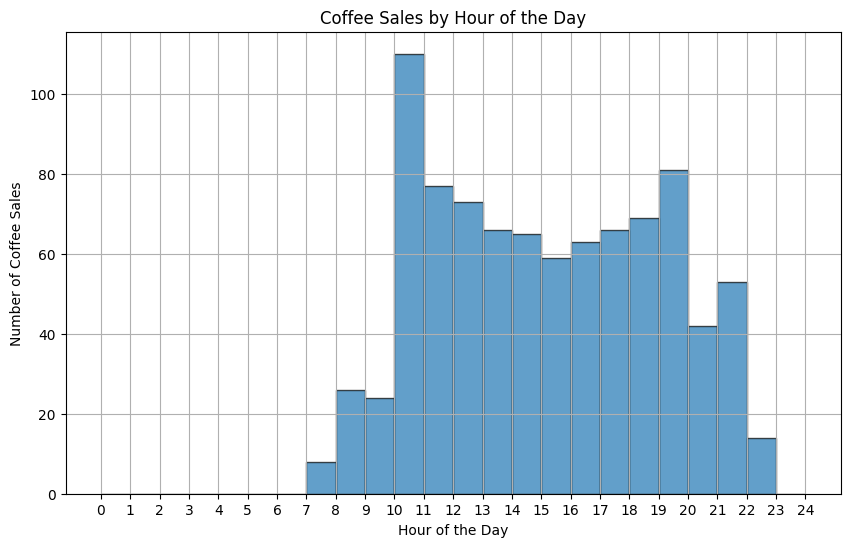

In [49]:
# Extract the hour of the day from the 'Time' column
df['hour'] = df['datetime'].dt.hour
 
# Create a histogram to visualize UFO sightings by hour
plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Coffee Sales')
plt.title('Coffee Sales by Hour of the Day')
plt.xticks(range(0, 25))
plt.grid(True)
plt.show()

In [ ]:
# if df['time'] 
# df['time_pod'] = df['time']
# morning = 06:00:00 - 12:00:00
# afternoon =12:01:00 - 18:00:00
# evening =  18:01:00- 00:00:00
# night = 00:01:00 - 06:00:00